# Query Hardness Visualization

This notebook visualizes query hardness metrics from the JSON data file.

Sixteen scatter plots are generated (all with Recall on x-axis):

**Original Metrics:**
- Recall vs Escape Hardness
- Recall vs Frontier Churn
- Recall vs Self-Consistency
- Recall vs NDC (Number of Distance Computations)
- Recall vs Top-k Margin
- Recall vs Top-k Cohesion
- Recall vs Jitter (Micro-Perturbation Stability)
- Recall vs Reachability Probe (τ-Reachability Probe)

**New Metrics:**
- Recall vs Self-Consistency 2x
- Recall vs Signature Dissimilarity
- Recall vs S
- Recall vs r_visit
- Recall vs r_early
- Recall vs delta_frontier
- Recall vs m_frontier
- Recall vs delta_improve


In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10


In [3]:
# Load data
json_path = '../data/t2i-10M/query_hardness_results.json'

with open(json_path, 'r') as f:
    data = json.load(f)

queries = data['queries']
stats = data.get('statistics', {})

# Extract original metrics
recall = [q['recall'] for q in queries]
escape_hardness = [q['escape_hardness'] for q in queries]
frontier_churn = [q['frontier_churn'] for q in queries]
self_consistency = [q['self_consistency'] for q in queries]
ndc = [q['ndc'] for q in queries]
top_k_margin = [q['top_k_margin'] for q in queries]
top_k_cohesion = [q['top_k_cohesion'] for q in queries]
jitter = [q['jitter'] for q in queries]
reachability_probe = [q['reachability_probe'] for q in queries]

# Extract new metrics
self_consistency_2x = [q.get('self_consistency_2x', 0) for q in queries]
signature_dissimilarity = [q.get('signature_dissimilarity', 0) for q in queries]
S = [q.get('S', 0) for q in queries]
r_visit = [q.get('r_visit', 0) for q in queries]
r_early = [q.get('r_early', 0) for q in queries]
delta_frontier = [q.get('delta_frontier', 0) for q in queries]
m_frontier = [q.get('m_frontier', 0) for q in queries]
top1_last1_diff = [q.get('top1_last1_diff', 0) for q in queries]
delta_improve = [q.get('delta_improve', 0) for q in queries]

# Calculate P90 of recall
p90_recall = np.percentile(recall, 90)

print(f"Loaded {len(queries)} queries")
print(f"\nP90 Recall: {p90_recall:.4f}")
print(f"\nStatistics:")
for key, value in stats.items():
    if key not in ['avg_hubness_mean', 'avg_hubness_var', 'avg_distance_slope', 
                   'avg_distance_gini', 'avg_signature_dissimilarity']:
        print(f"  {key}: {value}")


Loaded 1000 queries

P90 Recall: 0.9600

Statistics:
  avg_recall: 0.71309
  avg_escape_hardness: 89.290573
  avg_frontier_churn: 0.020356
  p90_frontier_churn: 0.039604
  avg_self_consistency: 0.152077
  avg_self_consistency_2x: 0.212971
  avg_ndc: 1748.975952
  avg_top_k_margin: 0.000342
  avg_top_k_cohesion: 0.714845
  avg_jitter: 0.54575
  avg_reachability_probe: 0.081733
  avg_r_visit: 17.316595
  avg_r_early: 0.964487
  avg_top1_last1_diff: 0.060374
  avg_delta_improve: 0.363361


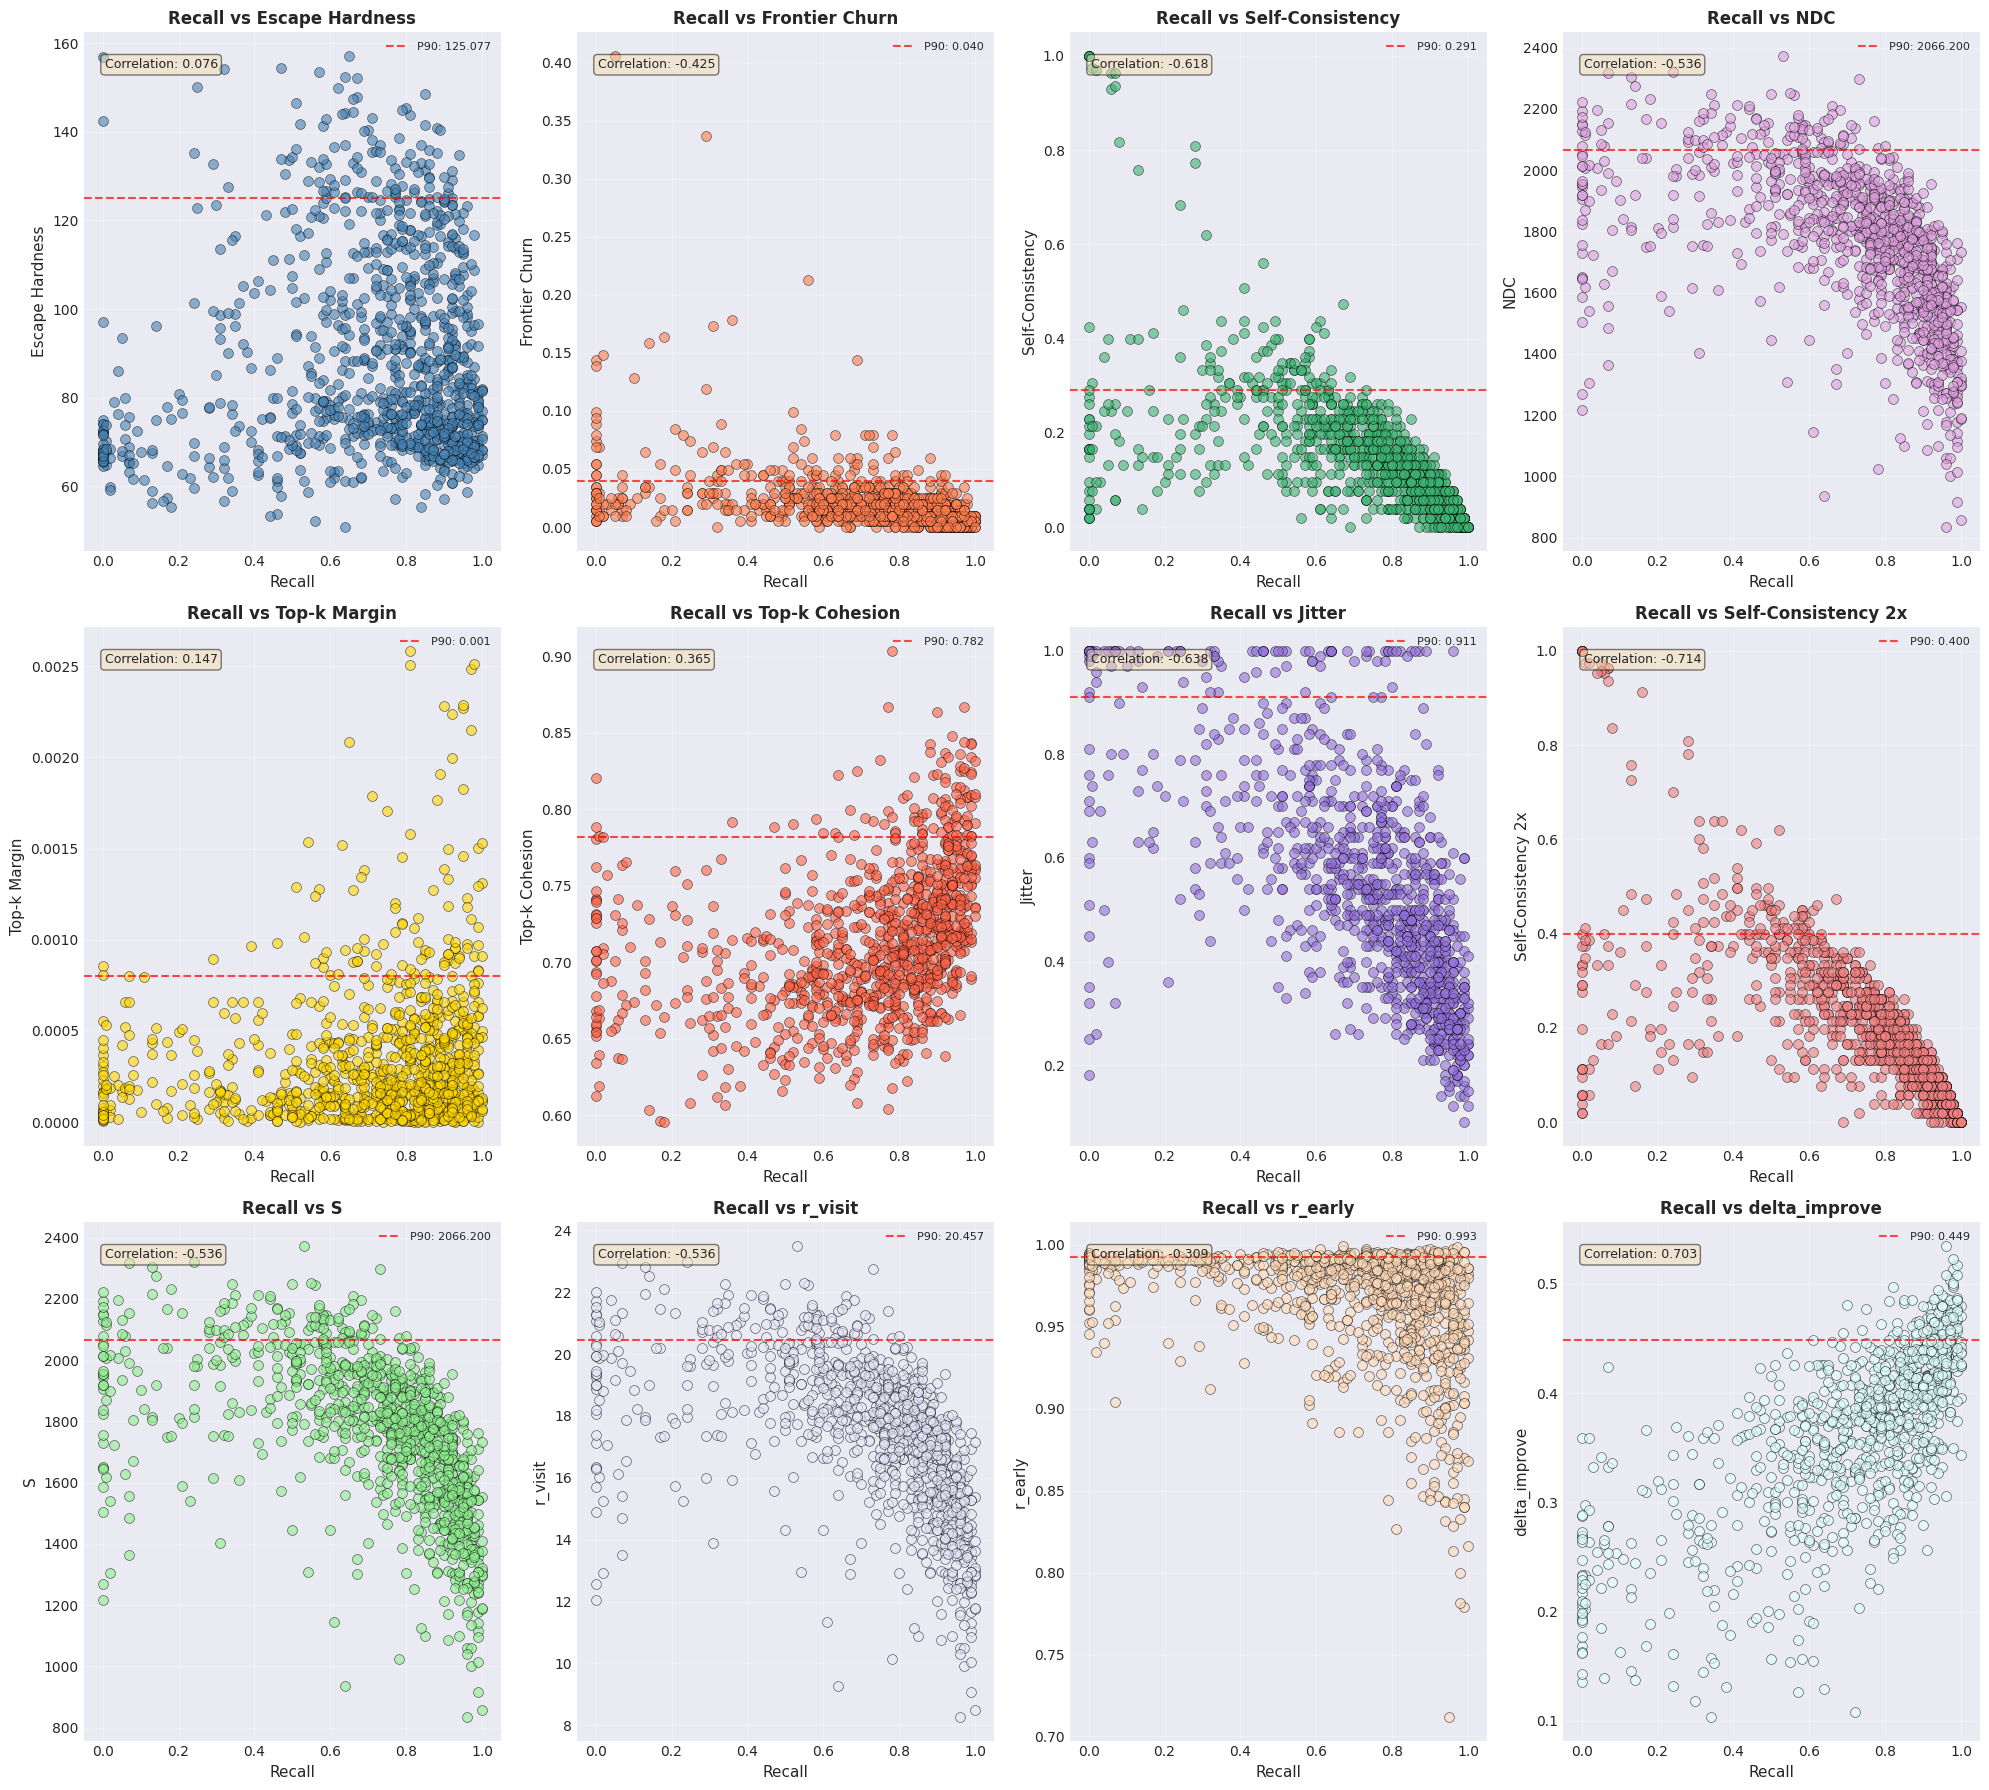


Scatter plots saved to: ../data/t2i-10M/query_hardness_scatter_plots.png


In [8]:
# Helper function to create a scatter plot
def create_scatter_plot(ax, x_data, y_data, ylabel, title, color, xlabel='Recall'):
    ax.scatter(x_data, y_data, alpha=0.6, s=50, c=color, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add P90 horizontal line (parallel to x-axis)
    p90_y = np.percentile(y_data, 90)
    x_min, x_max = ax.get_xlim()
    ax.axhline(y=p90_y, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'P90: {p90_y:.3f}')
    ax.set_xlim(x_min, x_max)  # Restore x limits
    
    
    # Add correlation coefficient
    corr = np.corrcoef(x_data, y_data)[0, 1]
    ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Add legend for P90 line
    ax.legend(loc='upper right', fontsize=8, framealpha=0.7)

# Create subplots (4 rows x 4 columns for 16 plots)
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
# fig.suptitle('Query Hardness Metrics vs Recall', fontsize=16, fontweight='bold')

# Original metrics (first 8 plots)
create_scatter_plot(axes[0, 0], recall, escape_hardness, 'Escape Hardness', 
                   'Recall vs Escape Hardness', 'steelblue')
create_scatter_plot(axes[0, 1], recall, frontier_churn, 'Frontier Churn', 
                   'Recall vs Frontier Churn', 'coral')
create_scatter_plot(axes[0, 2], recall, self_consistency, 'Self-Consistency', 
                   'Recall vs Self-Consistency', 'mediumseagreen')
create_scatter_plot(axes[0, 3], recall, ndc, 'NDC', 
                   'Recall vs NDC', 'plum')
create_scatter_plot(axes[1, 0], recall, top_k_margin, 'Top-k Margin', 
                   'Recall vs Top-k Margin', 'gold')
create_scatter_plot(axes[1, 1], recall, top_k_cohesion, 'Top-k Cohesion', 
                   'Recall vs Top-k Cohesion', 'tomato')
create_scatter_plot(axes[1, 2], recall, jitter, 'Jitter', 
                   'Recall vs Jitter', 'mediumpurple')

# New metrics (next 8 plots)
create_scatter_plot(axes[1, 3], recall, self_consistency_2x, 'Self-Consistency 2x', 
                   'Recall vs Self-Consistency 2x', 'lightcoral')
create_scatter_plot(axes[2, 0], recall, S, 'S', 
                   'Recall vs S', 'lightgreen')
create_scatter_plot(axes[2, 1], recall, r_visit, 'r_visit', 
                   'Recall vs r_visit', 'lavender')
create_scatter_plot(axes[2, 2], recall, r_early, 'r_early', 
                   'Recall vs r_early', 'peachpuff')
create_scatter_plot(axes[2, 3], recall, delta_improve, 'delta_improve', 
                   'Recall vs delta_improve', 'lightcyan')

plt.tight_layout()
plt.savefig('../data/t2i-10M/query_hardness_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nScatter plots saved to: ../data/t2i-10M/query_hardness_scatter_plots.png")
